## Format Flickr Dataset

In [1]:
import os

dir_path = os.path.abspath('')
os.chdir(dir_path)

In [2]:
%reload_ext autoreload
%autoreload 2

In [ ]:
Things to do:
- use *create_input_files* function to read and format the .json file with the captions

### Checking what are the "features" in MSCOCO dataset

In [13]:
import sys
import base64
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

0it [00:00, ?it/s]

reading tsv...
36


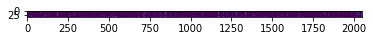

0it [00:00, ?it/s]


In [16]:
infile='./bottom-up_features/trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv'
FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']

print("reading tsv...")
with open(infile, "r+") as tsv_in_file:
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)

    for item in tqdm(reader):
        item['num_boxes'] = int(item['num_boxes'])
        print(item['num_boxes'])
        image_id = int(item['image_id'])

        features= np.frombuffer(
            base64.decodebytes(bytes(item['features'], 'utf-8')),
            dtype=np.float32).reshape((item['num_boxes'], -1))

        plt.show()
        break